importing the libraries that we will use 

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif , RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression



    inserting my dataset

In [2]:
df=pd.read_csv("D:\my staj machin\WA_Fn-UseC_-Telco-Customer-Churn.csv")

     displays the first ten rows

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


     Data types of each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


      summary statistics 

In [5]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


    Visualizing Distributions 

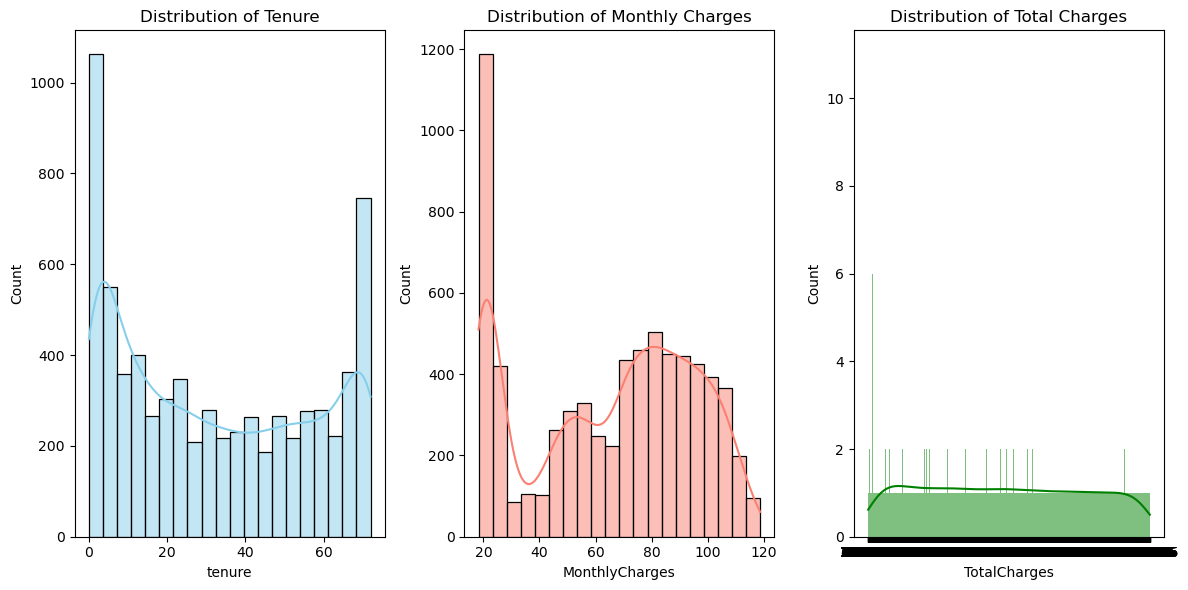

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['tenure'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tenure')

plt.subplot(1, 3, 2)
sns.histplot(df['MonthlyCharges'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Monthly Charges')

plt.subplot(1, 3, 3)
sns.histplot(df['TotalCharges'], bins=20, kde=True, color='green')
plt.title('Distribution of Total Charges')

plt.tight_layout()
plt.show()

 we can see that in the TotalCcharges our plot is viwing not real disribution so we need to see if the TotalChrges is numerical or not so we will Convert non-numeric values to numerical and Handle numerical values

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

    Visualizing Distributions  again

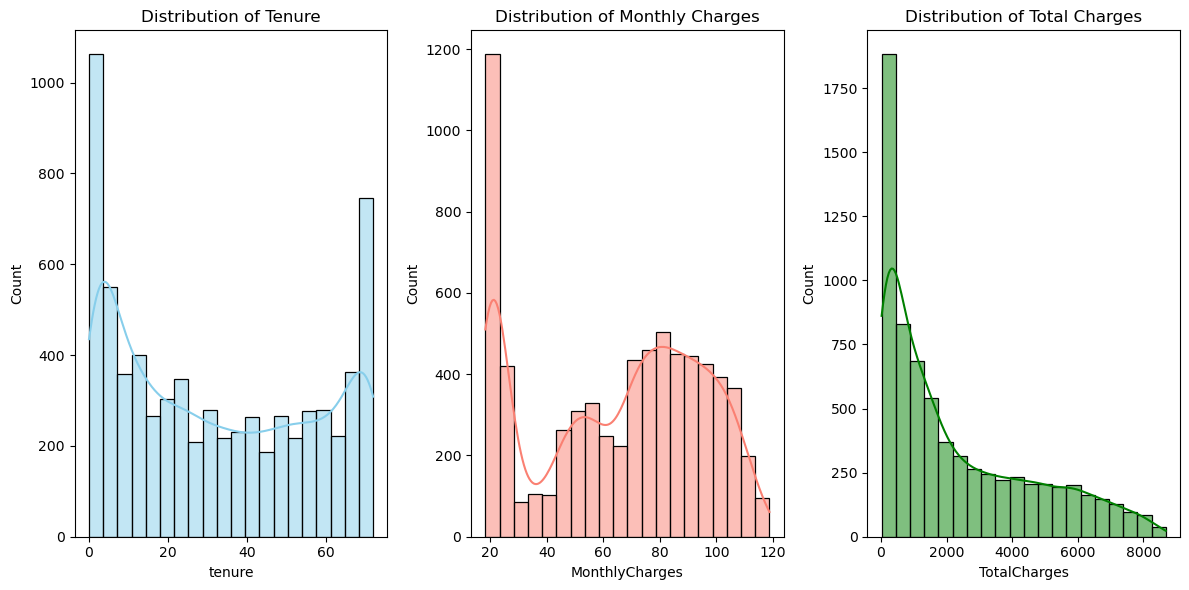

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['tenure'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tenure')

plt.subplot(1, 3, 2)
sns.histplot(df['MonthlyCharges'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Monthly Charges')

plt.subplot(1, 3, 3)
sns.histplot(df['TotalCharges'], bins=20, kde=True, color='green')
plt.title('Distribution of Total Charges')

plt.tight_layout()
plt.show()

      Compute correlation matrix and Plot correlation heatmap

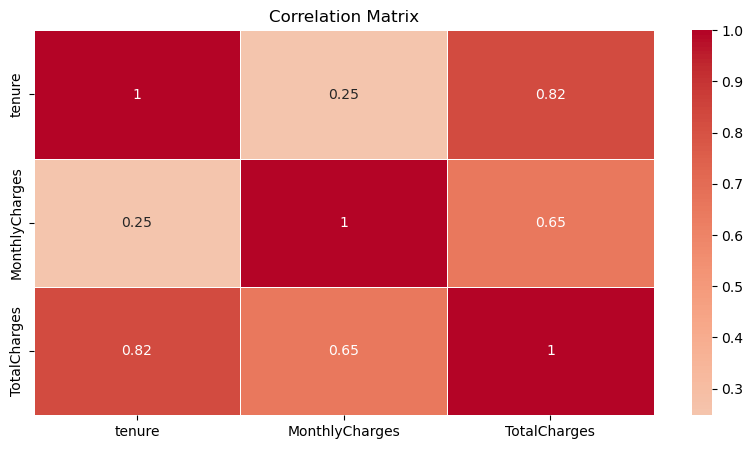

In [9]:
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

     Visualizing Categorical 

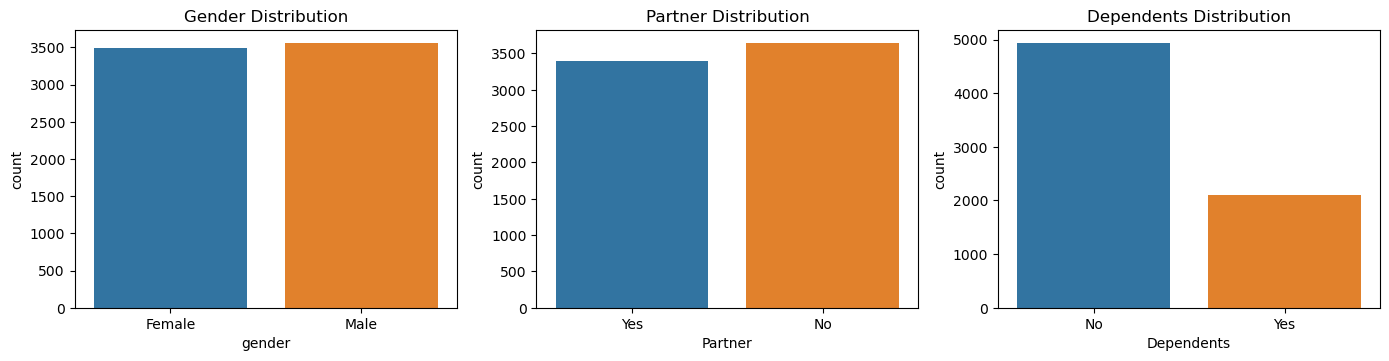

In [10]:
plt.figure(figsize=(14, 10))


plt.subplot(3, 3, 1)
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')


plt.subplot(3, 3, 2)
sns.countplot(x='Partner', data=df)
plt.title('Partner Distribution')


plt.subplot(3, 3, 3)
sns.countplot(x='Dependents', data=df)
plt.title('Dependents Distribution')


plt.tight_layout()
plt.show()

     check for missing values

In [11]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


    Drop irrelevant columns

In [12]:
df.drop(columns=['customerID'], inplace=True)

    Label Encoding

In [13]:

df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

   One-Hot Encoding

In [14]:
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                        'PaperlessBilling', 'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [15]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


    Splitting Features and Target Variable

In [16]:
X = df.drop(columns=['Churn'])
y = df['Churn']

     Splitting the Dataset into Training and Testing Sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


      Normalization and Scaling

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


      Feature Selection   filter method 10 Features  

In [19]:
selector = SelectKBest(score_func=f_classif, k=10)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)


feature_scores = selector.scores_

selected_features_kbest = X.columns[selector.get_support()]
print("Top 10 Selected Features (Filter Method - ANOVA F-value):", selected_features_kbest)


Top 10 Selected Features (Filter Method - ANOVA F-value): Index(['tenure', 'InternetService_Fiber optic',
       'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')


     Apply SelectKBest to select the top 1 Feature

In [20]:
selector_single = SelectKBest(score_func=f_classif, k=1)
X_train_kbest_single = selector_single.fit_transform(X_train, y_train)
X_test_kbest_single = selector_single.transform(X_test)

selected_feature_kbest_single = X.columns[selector_single.get_support()]
print("Top 1 Selected Feature (Filter Method - ANOVA F-value):", selected_feature_kbest_single)

Top 1 Selected Feature (Filter Method - ANOVA F-value): Index(['tenure'], dtype='object')


    Wrapper Methods  10 Features

In [21]:
model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

selected_features_rfe = X.columns[rfe.get_support()]
print("Top 10 Selected Features (Wrapper Method):", selected_features_rfe)




Top 10 Selected Features (Wrapper Method): Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check'],
      dtype='object')


    Apply RFE to select top 1 feature

In [22]:
rfe_single = RFE(estimator=model, n_features_to_select=1)
X_train_rfe_single = rfe_single.fit_transform(X_train, y_train)
X_test_rfe_single = rfe_single.transform(X_test)

selected_feature_rfe_single = X.columns[rfe_single.get_support()]
print("Top 1 Selected Feature (Wrapper Method):", selected_feature_rfe_single)

Top 1 Selected Feature (Wrapper Method): Index(['TotalCharges'], dtype='object')


     Embedded Methods  10 Features

In [23]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]
selected_features_embedded = X.columns[indices]
print("Top 10 Selected Features (Embedded Method):", selected_features_embedded)



Top 10 Selected Features (Embedded Method): Index(['OnlineSecurity_Yes', 'Partner_Yes', 'PaperlessBilling_Yes',
       'gender_Male', 'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'MonthlyCharges', 'tenure',
       'TotalCharges'],
      dtype='object')


     Get the index of the top 1 feature

In [24]:
index_single = np.argmax(importances)

selected_feature_embedded_single = X.columns[index_single]
print("Top 1 Selected Feature (Embedded Method):", selected_feature_embedded_single)

Top 1 Selected Feature (Embedded Method): TotalCharges


      Model Training 

          Decision Tree for only the Accuracy 

In [25]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


dt_predictions = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 0.71


      Random Forest  only the Accuracy 

In [26]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.79


     K-Nearest Neighbors (KNN)  only the Accuracy 

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.2f}")


KNN Accuracy: 0.77


     Support Vector Machine (SVM) only the Accuracy 

In [28]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Accuracy: 0.82


    Model Evaluation for all algorithms

In [29]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probs)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    
    return predictions

print("Decision Tree:")
dt_predictions = evaluate_model(dt_model, X_test, y_test)

print("\nRandom Forest:")
rf_predictions = evaluate_model(rf_model, X_test, y_test)

print("\nK-Nearest Neighbors:")
knn_predictions = evaluate_model(knn_model, X_test, y_test)

print("\nSupport Vector Machine:")
svm_predictions = evaluate_model(svm_model, X_test, y_test)


Decision Tree:
Accuracy: 0.71
Precision: 0.45
Recall: 0.45
F1-Score: 0.45
ROC-AUC: 0.63

Random Forest:
Accuracy: 0.79
Precision: 0.65
Recall: 0.46
F1-Score: 0.54
ROC-AUC: 0.84

K-Nearest Neighbors:
Accuracy: 0.77
Precision: 0.58
Recall: 0.52
F1-Score: 0.55
ROC-AUC: 0.79

Support Vector Machine:
Accuracy: 0.82
Precision: 0.69
Recall: 0.60
F1-Score: 0.64
ROC-AUC: 0.85


      Confusion Matrix  

In [30]:
def plot_confusion_matrix(y_test, predictions, title):
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()

       plot for Decision Tree

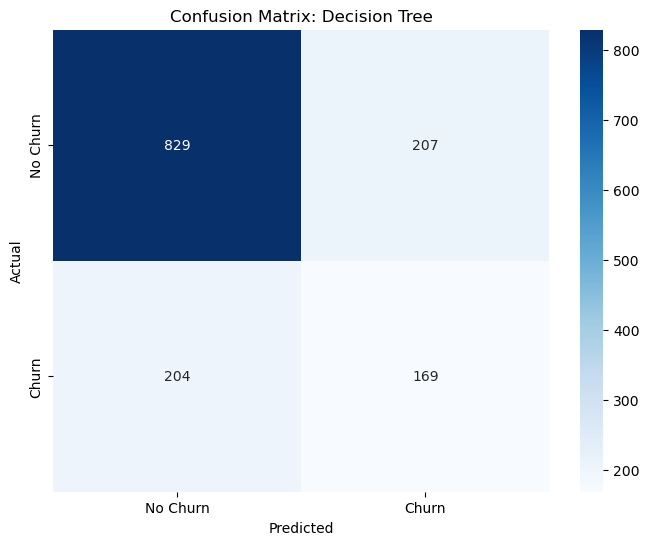

In [31]:
plot_confusion_matrix(y_test, dt_predictions, 'Decision Tree')

     Random Forest

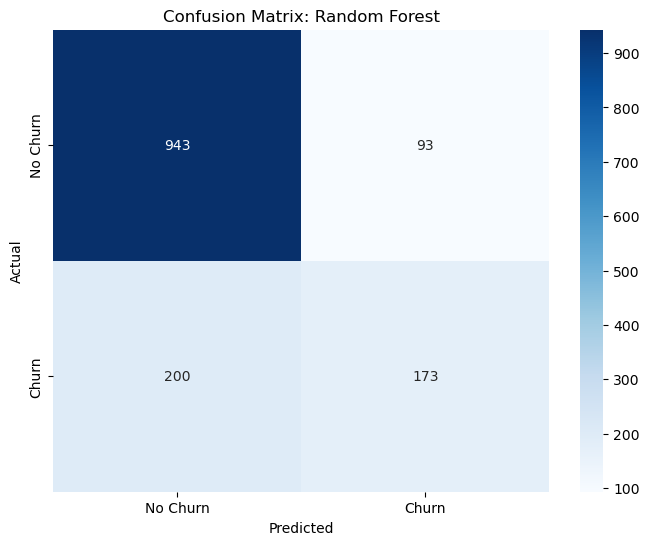

In [32]:
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest')

      K-Nearest Neighbors

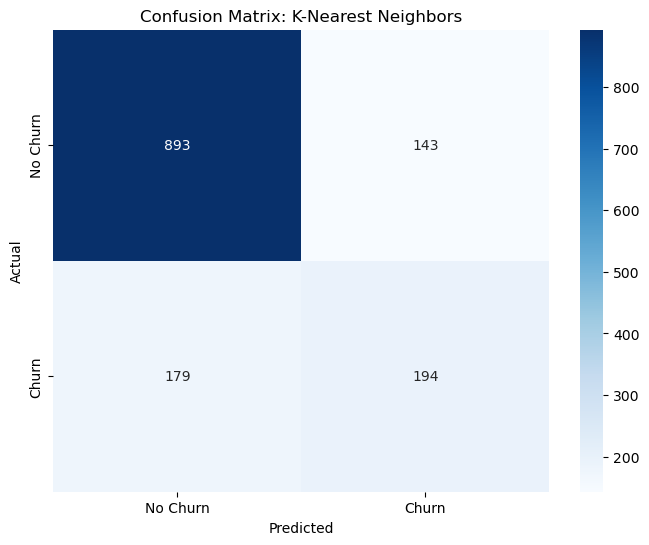

In [33]:
plot_confusion_matrix(y_test, knn_predictions, 'K-Nearest Neighbors')

      Support Vector Machine

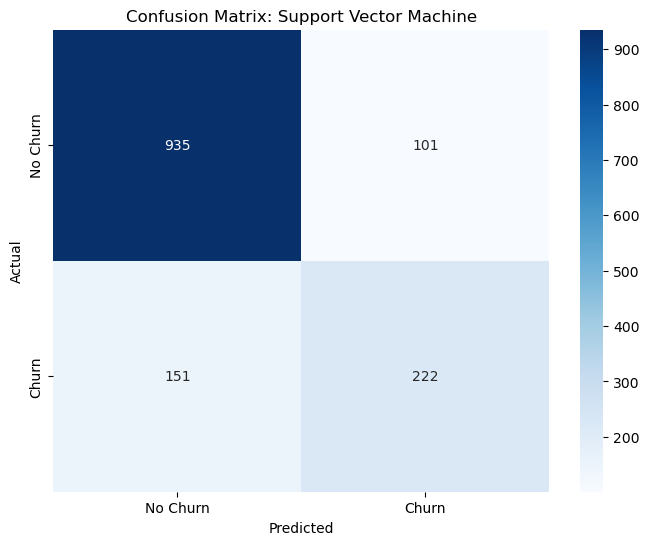

In [34]:
plot_confusion_matrix(y_test, svm_predictions, 'Support Vector Machine')

    Cross-Validation

       Ensure the feature matrix X is a contiguous array

In [35]:
 X = np.ascontiguousarray(X)

      Initialize the models and  Function to perform cross-validation

In [36]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
svm_model = SVC(random_state=42)

def cross_val(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'Cross-Validation Scores: {scores}')
    print(f'Average Cross-Validation Score: {scores.mean():.2f}')



      Cross-validate each model

In [37]:
print("Decision Tree Cross-Validation:")
cross_val(dt_model, X, y)

print("\nRandom Forest Cross-Validation:")
cross_val(rf_model, X, y)

print("\nK-Nearest Neighbors Cross-Validation:")
cross_val(knn_model, X, y)

print("\nSupport Vector Machine Cross-Validation:")
cross_val(svm_model, X, y)

Decision Tree Cross-Validation:
Cross-Validation Scores: [0.73314407 0.73527324 0.71682044 0.72869318 0.73934659]
Average Cross-Validation Score: 0.73

Random Forest Cross-Validation:
Cross-Validation Scores: [0.79276082 0.79559972 0.77004968 0.80042614 0.79545455]
Average Cross-Validation Score: 0.79

K-Nearest Neighbors Cross-Validation:
Cross-Validation Scores: [0.7523066  0.77146913 0.75798439 0.7578125  0.76988636]
Average Cross-Validation Score: 0.76

Support Vector Machine Cross-Validation:
Cross-Validation Scores: [0.73456352 0.73456352 0.73456352 0.73508523 0.734375  ]
Average Cross-Validation Score: 0.73


 Prediction

   Split features and target and  Split the dataset into training and testing sets and  Normalize the feature variables

In [38]:
X = df.drop('Churn', axis=1)
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


 Initialize models and  Train models

In [39]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
svm_model = SVC(probability=True, random_state=42)


dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

 Predict on the test set and Function to print evaluation metrics and Evaluate each model

In [40]:
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)


def evaluate_model(y_test, predictions):
    print(classification_report(y_test, predictions))
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))


print("Decision Tree Evaluation:")
evaluate_model(y_test, dt_predictions)
print("\nRandom Forest Evaluation:")
evaluate_model(y_test, rf_predictions)
print("\nK-Nearest Neighbors Evaluation:")
evaluate_model(y_test, knn_predictions)
print("\nSupport Vector Machine Evaluation:")
evaluate_model(y_test, svm_predictions)

Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1036
           1       0.45      0.45      0.45       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409

Accuracy: 0.7083037615330021
Confusion Matrix:
[[829 207]
 [204 169]]

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy: 0.7920511000709723
Confusion Matrix:
[[943  93]
 [200 173]]

K-Nearest Neighbors Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1036
           

    Print predictions for each model

In [41]:
print("Decision Tree Predictions:")
print(dt_predictions)
print("\nRandom Forest Predictions:")
print(rf_predictions)
print("\nK-Nearest Neighbors Predictions:")
print(knn_predictions)
print("\nSupport Vector Machine Predictions:")
print(svm_predictions)


Decision Tree Predictions:
[1 1 0 ... 0 0 1]

Random Forest Predictions:
[1 0 0 ... 0 0 0]

K-Nearest Neighbors Predictions:
[1 0 0 ... 0 0 0]

Support Vector Machine Predictions:
[1 0 0 ... 0 0 0]


    Function to plot histogram of predictions

In [42]:
def plot_prediction_histogram(predictions, title):
    sns.histplot(predictions, bins=10, kde=True)
    plt.title(title)
    plt.xlabel('Predicted Class')
    plt.ylabel('Frequency')
    plt.show()



       Plot histogram of predictions for each model

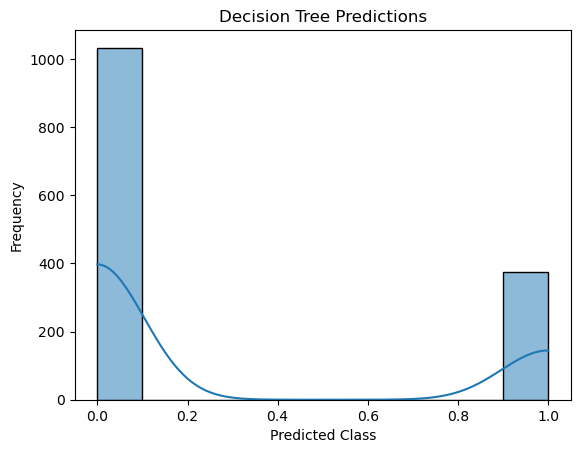

In [43]:
plot_prediction_histogram(dt_predictions, "Decision Tree Predictions")

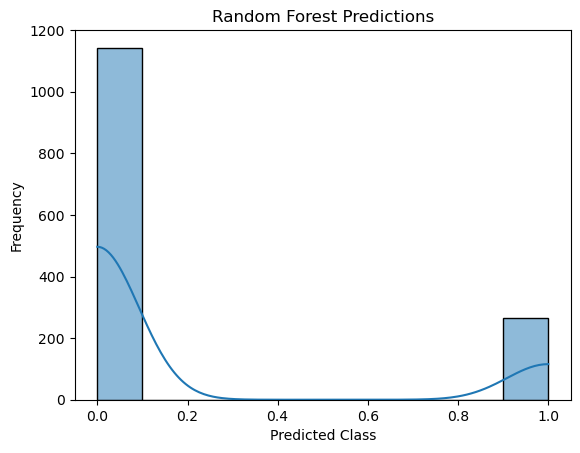

In [44]:
plot_prediction_histogram(rf_predictions, "Random Forest Predictions")

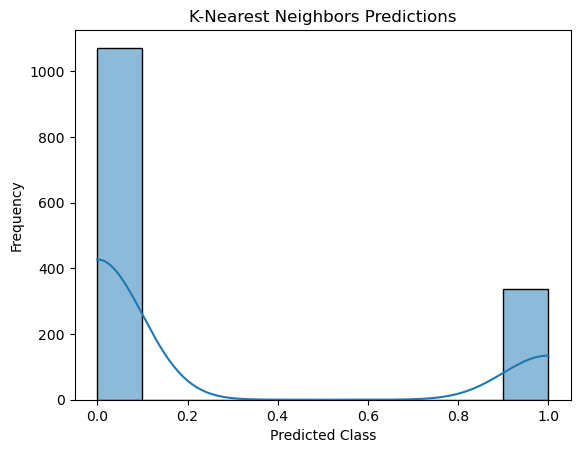

In [45]:
plot_prediction_histogram(knn_predictions, "K-Nearest Neighbors Predictions")

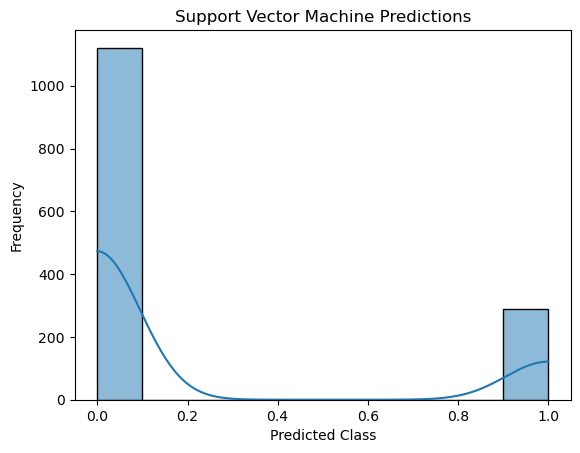

In [46]:
plot_prediction_histogram(svm_predictions, "Support Vector Machine Predictions")

         K-Fold Cross Validation

     Initialize K-Fold Cross Validation

In [47]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

     Function to evaluate models using cross-validation and  Evaluate each model

In [48]:
def evaluate_model(model, X, y):

    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    return np.mean(scores)


dt_cv_score = evaluate_model(dt_model, X, y)
rf_cv_score = evaluate_model(rf_model, X, y)
knn_cv_score = evaluate_model(knn_model, X, y)
svm_cv_score = evaluate_model(svm_model, X, y)



        Print the cross-validation scores

In [49]:
print(f"Decision Tree CV Score: {dt_cv_score}")

Decision Tree CV Score: 0.723276098457965


In [50]:
print(f"Random Forest CV Score: {rf_cv_score}")

Random Forest CV Score: 0.7925583908639268


In [51]:
print(f"K-Nearest Neighbors CV Score: {knn_cv_score}")

K-Nearest Neighbors CV Score: 0.7577754008323117


In [52]:
print(f"Support Vector Machine CV Score: {svm_cv_score}")

Support Vector Machine CV Score: 0.8020722103038906


        Overfitting

    Regularization Logistic Regression 

In [73]:
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=10000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[935 101]
 [151 222]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



      Pruning with Decision Tree 

In [74]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


[[964  72]
 [201 172]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.46      0.56       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



     Implementing Accuracy Calculation in Code

In [75]:
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

train_accuracy = nn_model.evaluate(X_train, y_train, verbose=0)[1]
print(f'Training Accuracy: {train_accuracy:.4f}')

test_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9463 - loss: 0.1398 - val_accuracy: 0.7622 - val_loss: 0.7573
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9354 - loss: 0.1526 - val_accuracy: 0.7675 - val_loss: 0.7893
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9392 - loss: 0.1492 - val_accuracy: 0.7533 - val_loss: 0.7806
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9449 - loss: 0.1425 - val_accuracy: 0.7516 - val_loss: 0.7758
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9482 - loss: 0.1349 - val_accuracy: 0.7578 - val_loss: 0.7909
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9458 - loss: 0.1289 - val_accuracy: 0.7516 - val_loss: 0.8018
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9361 - loss: 0.1446 - val_accuracy: 0.7595 - val_loss: 0.8190
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9383 - loss: 0.1427 - val_accuracy: 0.